In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('credit_train.csv')

In [3]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# **2.NULL Treatment**

In [5]:
df.isna().sum()

,0
Loan ID,514
Customer ID,514
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514


In [6]:
for i in df.columns:
    a = df[i].isna().sum()
    if a < 600 and df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    elif a < 600 and df[i].dtype != 'object':
        df[i] = df[i].fillna(df[i].mean())
    else:
        df.drop(columns=i, inplace=True)

In [7]:
df.isna().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0
Number of Open Accounts,0


# **3.EDA**

In [8]:
con=[]
cat=[]
for i in df.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [9]:
print('con:',con)
print('cat:',cat)

con: ['Current Loan Amount', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens']
cat: ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Home Ownership', 'Purpose']


# **4.Correlation Between Variable**

drop that column which is less correlated

In [10]:
X=df.drop(labels=['Loan Status'],axis=1)
Y=df[['Loan Status']]

In [11]:
con=[]
cat=[]
for i in X:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [12]:
Xcat=X[cat]
Xcon=X[con]

# **5.Data Preprocessing**

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(X[i])

In [16]:
Xcat

,Loan ID,Customer ID,Term,Home Ownership,Purpose
0,6697,48724,1,1,5
1,23041,14688,1,1,3
2,25441,30541,1,2,3
3,38341,74173,0,2,3
4,68058,41470,1,3,3
...,...,...,...,...,...
100509,7,8,1,1,3
100510,7,8,1,1,3
100511,7,8,1,1,3
100512,7,8,1,1,3


# **6.Features scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [19]:
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [20]:
Xcon

,Current Loan Amount,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,-0.356914,-1.091727e+00,-1.427889e-01,-1.026318,1.727409e+00,-0.177096,-0.041140,-1.138334e-01
1,-0.362689,1.220673e+00,4.145666e-01,4.777142,-3.495776e-01,-0.172336,0.010760,-1.138334e-01
2,2.783370,8.834262e-01,-4.714858e-01,1.375114,1.727409e+00,0.008951,-0.001280,-1.138334e-01
3,-0.359997,-8.012766e-01,-8.859297e-01,-0.425960,-3.495776e-01,-0.102100,-0.044702,-1.138334e-01
4,-0.365405,1.784692e-01,-1.729109e+00,0.774756,-3.495776e-01,-0.109746,-0.039893,-1.138334e-01
...,...,...,...,...,...,...,...,...
100509,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17
100510,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17
100511,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17
100512,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17


# **7.Join**

In [21]:
X=Xcon.join(Xcat)

In [22]:
X

,Current Loan Amount,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Loan ID,Customer ID,Term,Home Ownership,Purpose
0,-0.356914,-1.091727e+00,-1.427889e-01,-1.026318,1.727409e+00,-0.177096,-0.041140,-1.138334e-01,6697,48724,1,1,5
1,-0.362689,1.220673e+00,4.145666e-01,4.777142,-3.495776e-01,-0.172336,0.010760,-1.138334e-01,23041,14688,1,1,3
2,2.783370,8.834262e-01,-4.714858e-01,1.375114,1.727409e+00,0.008951,-0.001280,-1.138334e-01,25441,30541,1,2,3
3,-0.359997,-8.012766e-01,-8.859297e-01,-0.425960,-3.495776e-01,-0.102100,-0.044702,-1.138334e-01,38341,74173,0,2,3
4,-0.365405,1.784692e-01,-1.729109e+00,0.774756,-3.495776e-01,-0.109746,-0.039893,-1.138334e-01,68058,41470,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17,7,8,1,1,3
100510,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17,7,8,1,1,3
100511,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17,7,8,1,1,3
100512,0.000000,2.995759e-16,5.077243e-16,0.000000,-5.764796e-17,0.000000,0.000000,1.347320e-17,7,8,1,1,3


# **8.Outliers Treatment**

In [23]:
out=[]
for i in Xcon.columns:
    ol=Xcon[(Xcon[i]>3)|(Xcon[i]<-3)].index
    out.extend(ol)

In [24]:
out

[257,
 311,
 451,
 513,
 516,
 552,
 619,
 653,
 691,
 694,
 744,
 818,
 826,
 877,
 1024,
 1074,
 1235,
 1248,
 1260,
 1442,
 1627,
 1767,
 1904,
 2033,
 2037,
 2058,
 2110,
 2122,
 2193,
 2319,
 2399,
 2400,
 2436,
 2531,
 2553,
 2572,
 2756,
 2851,
 2899,
 2924,
 2931,
 3068,
 3113,
 3226,
 3278,
 3285,
 3293,
 3298,
 3318,
 3362,
 3600,
 3669,
 3913,
 3979,
 4038,
 4109,
 4418,
 4428,
 4456,
 4515,
 4533,
 4552,
 4644,
 4660,
 4808,
 4828,
 4934,
 5053,
 5068,
 5208,
 5256,
 5311,
 5324,
 5369,
 5425,
 5515,
 5533,
 5602,
 5799,
 5811,
 5839,
 6009,
 6010,
 6118,
 6214,
 6488,
 6602,
 6624,
 6645,
 6648,
 6707,
 6766,
 6848,
 6909,
 6927,
 6963,
 6972,
 7006,
 7040,
 7089,
 7092,
 7107,
 7162,
 7219,
 7334,
 7392,
 7428,
 7472,
 7537,
 7555,
 7600,
 7617,
 7692,
 7881,
 7918,
 8047,
 8075,
 8080,
 8178,
 8183,
 8434,
 8511,
 8668,
 8740,
 8760,
 8843,
 8861,
 8867,
 8960,
 9023,
 9026,
 9045,
 9076,
 9118,
 9137,
 9375,
 9506,
 9667,
 9668,
 9736,
 9752,
 9837,
 9913,
 10061,
 1012

In [25]:
outliers=list(set(out))

In [26]:
outliers

[32768,
 1,
 98306,
 32776,
 65547,
 98315,
 65552,
 65553,
 32787,
 98325,
 32791,
 24,
 29,
 65566,
 32804,
 98341,
 65577,
 98347,
 46,
 98352,
 65584,
 98356,
 54,
 65591,
 65593,
 32829,
 63,
 32838,
 98374,
 74,
 65612,
 77,
 65614,
 65618,
 98388,
 32853,
 87,
 98393,
 32858,
 32860,
 96,
 32867,
 65644,
 98414,
 65648,
 98416,
 118,
 32888,
 98439,
 65673,
 32906,
 32905,
 65679,
 98451,
 151,
 32919,
 157,
 98462,
 160,
 161,
 32928,
 32929,
 98470,
 169,
 98482,
 180,
 98496,
 32961,
 32984,
 65753,
 98522,
 65756,
 32998,
 98538,
 65771,
 238,
 98548,
 248,
 65785,
 33018,
 257,
 98562,
 65804,
 33043,
 33049,
 98587,
 65826,
 98595,
 98601,
 300,
 33074,
 65843,
 311,
 312,
 98617,
 65860,
 98631,
 98636,
 98641,
 98644,
 33120,
 98662,
 363,
 369,
 33141,
 98678,
 376,
 98681,
 378,
 33148,
 65917,
 33151,
 33157,
 98693,
 98695,
 396,
 98700,
 33169,
 403,
 65944,
 33179,
 411,
 65947,
 65948,
 65951,
 98716,
 65963,
 98734,
 65969,
 33206,
 444,
 98752,
 98753,
 451,
 65

# **9.Drop Outliers**

In [27]:
X=X.drop(index=outliers,axis=0)
Y=Y.drop(index=outliers,axis=0)

In [28]:
# reindexing
X.index=range(0,X.shape[0])
Y.index=range(0,Y.shape[0])

# **10.To handle biased data**

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# **11.divide training and testing data**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

# **12.Model Building**

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
xtrain=np.array(xtrain)
xtest=np.array(xtest)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



dtr=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=5)
ad= AdaBoostClassifier(n_estimators=5)
lr=LogisticRegression()
knc= KNeighborsClassifier(n_neighbors=8)
svc=SVC()

alg=[dtr,rf,ad,lr,svc,knc]


for i in alg:
    model=i.fit(xtrain,ytrain)
    ts_pred=model.predict(xtest)
    tr_pred=model.predict(xtrain)
    tr_score=accuracy_score(tr_pred,ytrain)
    ts_score=accuracy_score(ts_pred,ytest)
    print(i)
    print('training score : ',tr_score)
    print('testing score : ',ts_score)
    print('*******************************')

DecisionTreeClassifier()
training score :  1.0
testing score :  0.72964151952916
*******************************
RandomForestClassifier(n_estimators=5)
training score :  0.97090612375933
testing score :  0.7522739432851793
*******************************
AdaBoostClassifier(n_estimators=5)
training score :  0.7756761818133177
testing score :  0.7723381487426432
*******************************
LogisticRegression()
training score :  0.7756761818133177
testing score :  0.7723381487426432
*******************************
SVC()
training score :  0.7756761818133177
testing score :  0.7723381487426432
*******************************
KNeighborsClassifier(n_neighbors=8)
training score :  0.7834479253056529
testing score :  0.7325842696629213
*******************************


here adaboost svc and logistic regression are best score and no overfit so we used adaboost algo

# **13.New Prediction**

In [41]:
df1=pd.read_csv('credit_test.csv')

In [42]:
df1

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **14.Null Tratment**

In [43]:
df1.isna().sum()

,0
Loan ID,353
Customer ID,353
Current Loan Amount,353
Term,353
Credit Score,2334
Annual Income,2334
Years in current job,780
Home Ownership,353
Purpose,353
Monthly Debt,353


<Axes: >

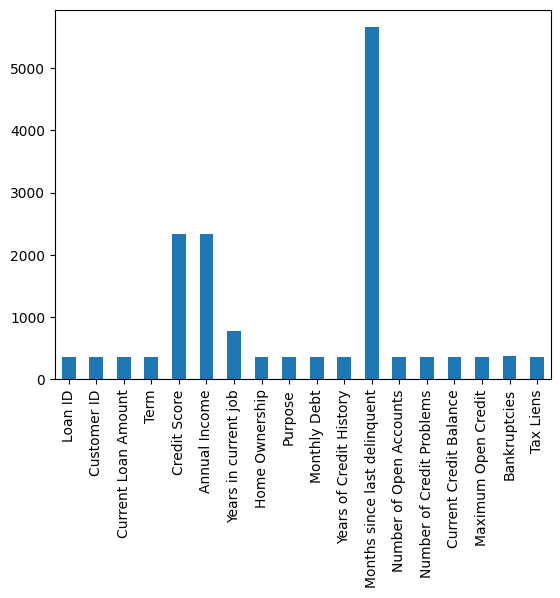

In [44]:
df1.isna().sum().plot(kind='bar')

In [45]:
for i in df1.columns:
    a= df1[i].isna().sum()
    if a < 30000 and df1[i].dtype == 'object':
        df1[i] = df1[i].fillna(df1[i].mode()[0])
    elif a < 30000 and df1[i].dtype != 'object':
        df1[i] = df1[i].fillna(df1[i].mean())
    else:
        df1.drop(columns=i, inplace=True)

# **15.Selecting same features as model**

In [46]:
df2=df1[X.columns]

In [47]:
df2.columns

Index(['Current Loan Amount', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens', 'Loan ID',
       'Customer ID', 'Term', 'Home Ownership', 'Purpose'],
      dtype='object')

# **16.Preprocessing**

In [48]:
ncat=[]
ncon=[]
for i in df2.columns:
    if df2[i].dtypes==object:
        ncat.append(i)
    else:
        ncon.append(i)

In [49]:
df2cat=df2[ncat]
df2con=df2[ncon]

In [50]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [51]:
le=LabelEncoder()
ss=StandardScaler()

In [52]:
df2con=pd.DataFrame(ss.fit_transform(df2con),columns=ncon)

In [53]:
for i in df2cat.columns:
    df2cat[i]=le.fit_transform(df2cat[i])

In [54]:
df2=df2con.join(df2cat)

## **16.prediction on new data**

In [55]:
pred=model.predict(df2)

In [56]:
pred

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

# **17.creating new dataframe having id and loan status predictions of house**

In [57]:
df3=pd.DataFrame(df1['Customer ID'],columns=['Customer ID'])

In [58]:
df4=pd.DataFrame(pred,columns=['Loan_status'])

In [59]:
df5=df3.join(df4)

In [60]:
df5

,Customer ID,Loan_status
0,ded0b3c3-6bf4-4091-8726-47039f2c1b90,Fully Paid
1,1630e6e3-34e3-461a-8fda-09297d3140c8,Fully Paid
2,2c60938b-ad2b-4702-804d-eeca43949c52,Fully Paid
3,12116614-2f3c-4d16-ad34-d92883718806,Fully Paid
4,39888105-fd5f-4023-860a-30a3e6f5ccb7,Fully Paid
...,...,...
10348,00010876-7972-40c5-8238-e1f187ca1396,Fully Paid
10349,00010876-7972-40c5-8238-e1f187ca1396,Fully Paid
10350,00010876-7972-40c5-8238-e1f187ca1396,Fully Paid
10351,00010876-7972-40c5-8238-e1f187ca1396,Fully Paid


In [61]:
df5['Loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)